In this project, we are going to explore the mall customer segmentation data. This is a clustering problem in machine learning. Clustering belongs to unsupervised learning so we don't have any kind of output labels here. If there are output labels present, then the problem is related to supervised learning. In this dataset, we are going to explore the customers based on few attributes.

## Dataset Information

You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

## Attributes

* <b>Customer ID</b>

* <b>Age</b>

* <b>Gender</b>

* <b>Annual income</b>

* <b>Spending score</b>

## Import Modules

* <b>pandas</b> - used to perform data manipulation and analysis

* <b>numpy</b> - used to perform a wide variety of mathematical operations on arrays

* <b>matplotlib</b> - used for data visualization and graphical plotting

* <b>seaborn</b> - built on top of matplotlib with similar functionalities

* <b>%matplotlib inline</b> - to enable the inline plotting

* <b>warnings</b> - to manipulate warnings details 

filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Load the Dataset

Now we load the dataset for processing.

In [16]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* We can see the top 5 samples of the dataset

* CustomerID is not necessary for the process so it can be dropped

In [17]:
# statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Statistical information of the dataset with minimum and maximum range in every column

In [18]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* Only one attribute is categorical and the rest are numerical

* There are no NULL values present in the data, further preprocessing is not necessary

* If any NULL value are present in dataset, they must be replaced with a value or drop the entire row

Now we can directly go to the exploratory data analysis.

## Exploratory Data Analysis

<Axes: xlabel='Gender', ylabel='count'>

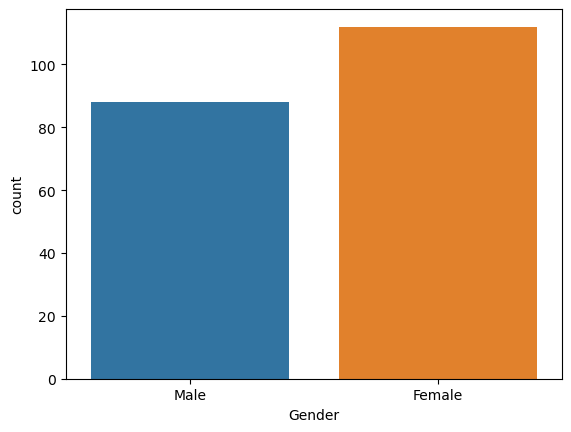

In [19]:
sns.countplot(x = 'Gender', data = df)

* We can see an almost equal distribution but female has majority

<Axes: xlabel='Age', ylabel='Density'>

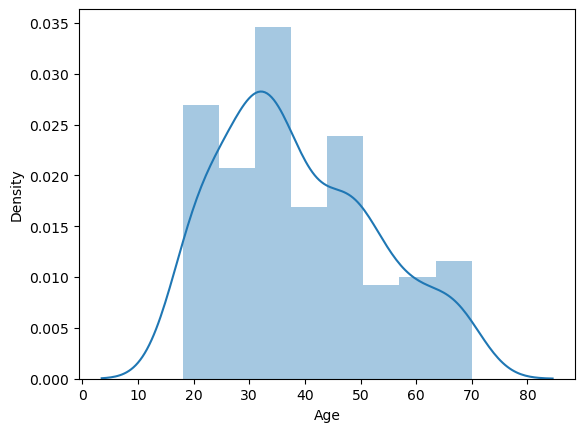

In [20]:
sns.distplot(df['Age'])

* Good distribution of the data, majority of the customers between age 30 to 40 years old

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

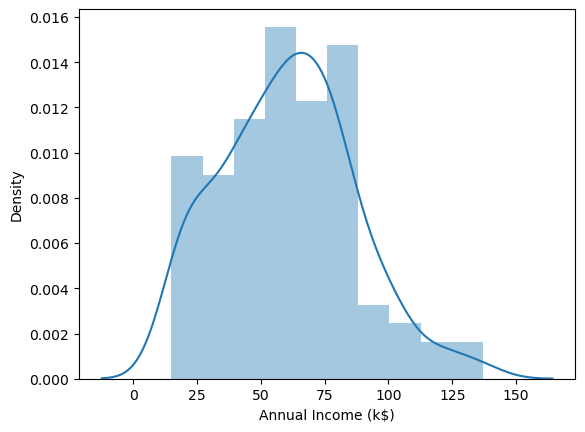

In [21]:
sns.distplot(df['Annual Income (k$)'])

* We can see the Annual Income, with a good distribution

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

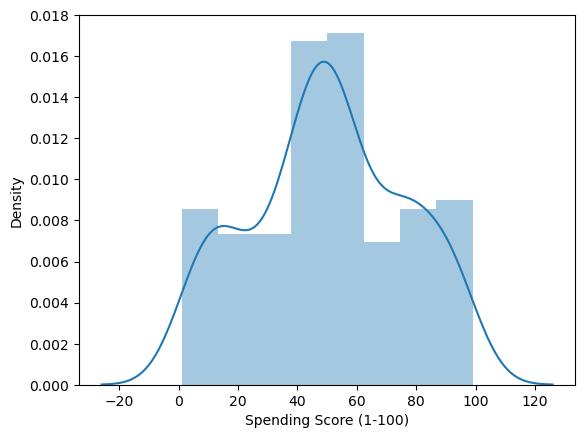

In [22]:
sns.distplot(df['Spending Score (1-100)'])

* Average spending is between 40 to 60

## Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables.

<Axes: >

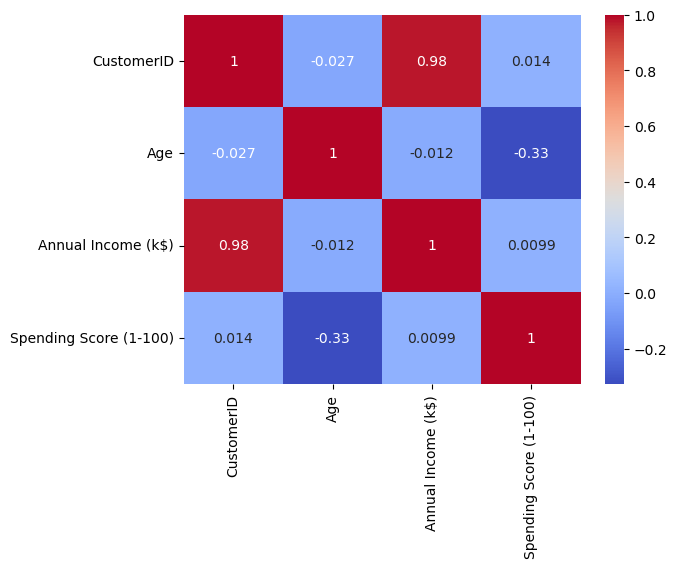

In [23]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

* The red color shows a positive correlation, and the blue color is a negative correlation

* In supervised learning, we can drop highly correlated attributes

* Since this is unsupervised learning, we will reduce the dimension of the dataset using principal component analysis



## Clustering

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
# cluster on 2 features
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


* First, Let us take only two attributes for processing

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

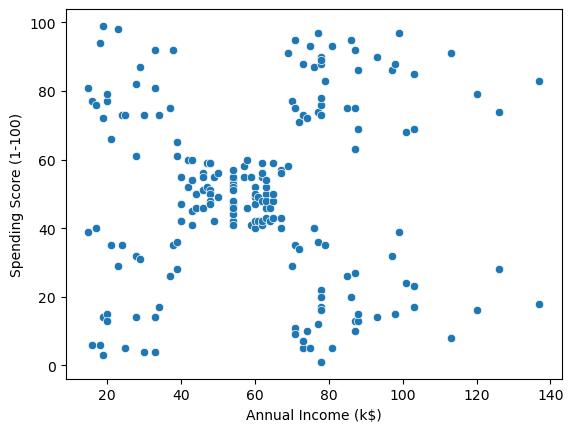

In [27]:
# scatter plot
sns.scatterplot(x = df1['Annual Income (k$)'], y = df1['Spending Score (1-100)'])

* Scatter plot of Annual income and Spending Score

* We can see the major part is in the center so that can be one cluster and the corners can be four other clusters or grouped for two other clusters

Now we can start clustering the data.

In [28]:
from sklearn.cluster import KMeans
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

* errors list will contains the sum of squared distances of samples to their closest cluster center

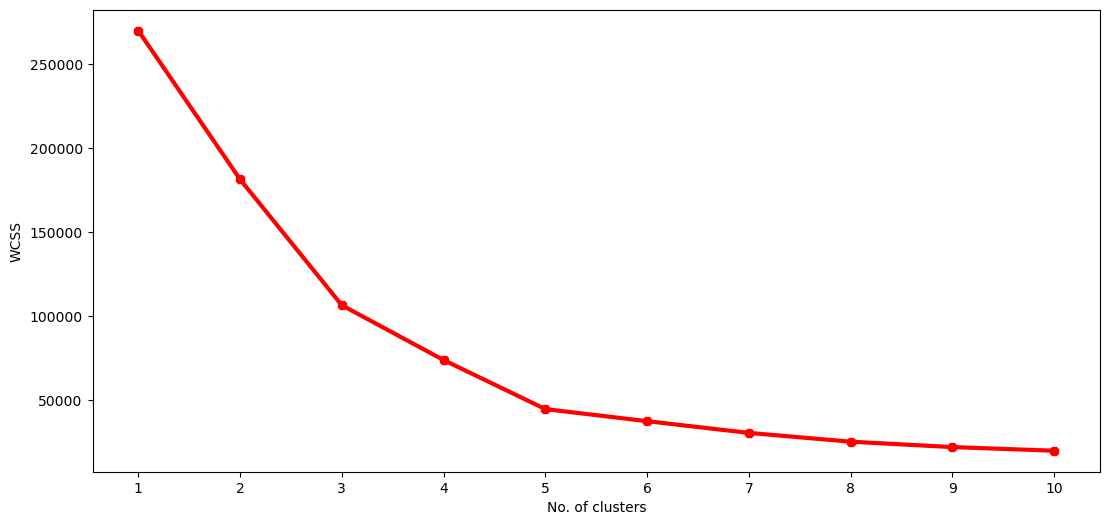

In [29]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

* We use elbow methods to find the number of clusters.

* The shape in a graph represents an elbow.

* We take the best cluster number from the joint of the elbow.

* The best cluster appears to be 5

In [30]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,2
1,15,81,4
2,16,6,2
3,16,77,4
4,17,40,2


* Added cluster label for each sample

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

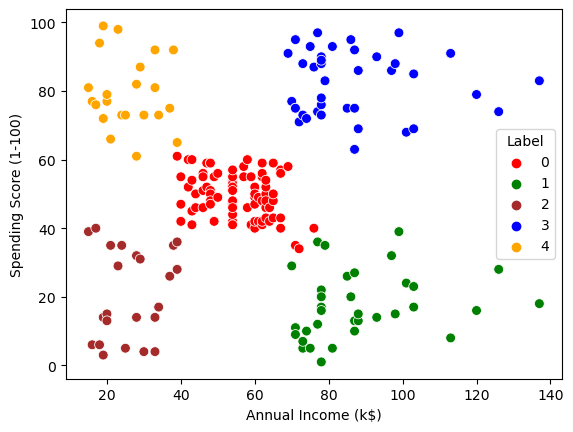

In [31]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

* Scatter plot graph of the clustered data based on cluster label

* Depending on the analysis of the data you can send specific offers to a group of customers in a cluster

Now let us use a three dimension data.

In [32]:
# cluster on 3 features
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [33]:
errors = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

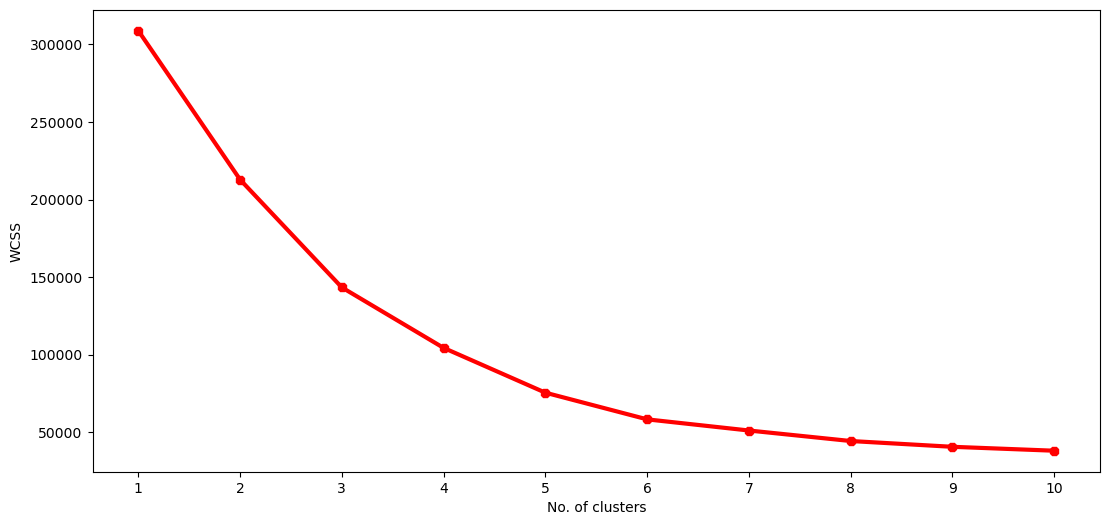

In [34]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

* The most optimal cluster is still 5

In [38]:
km = KMeans(n_clusters=5)
km.fit(df2) 
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,4
1,15,81,21,1
2,16,6,20,4
3,16,77,23,1
4,17,40,31,4


* Added cluster label for each sample in new data

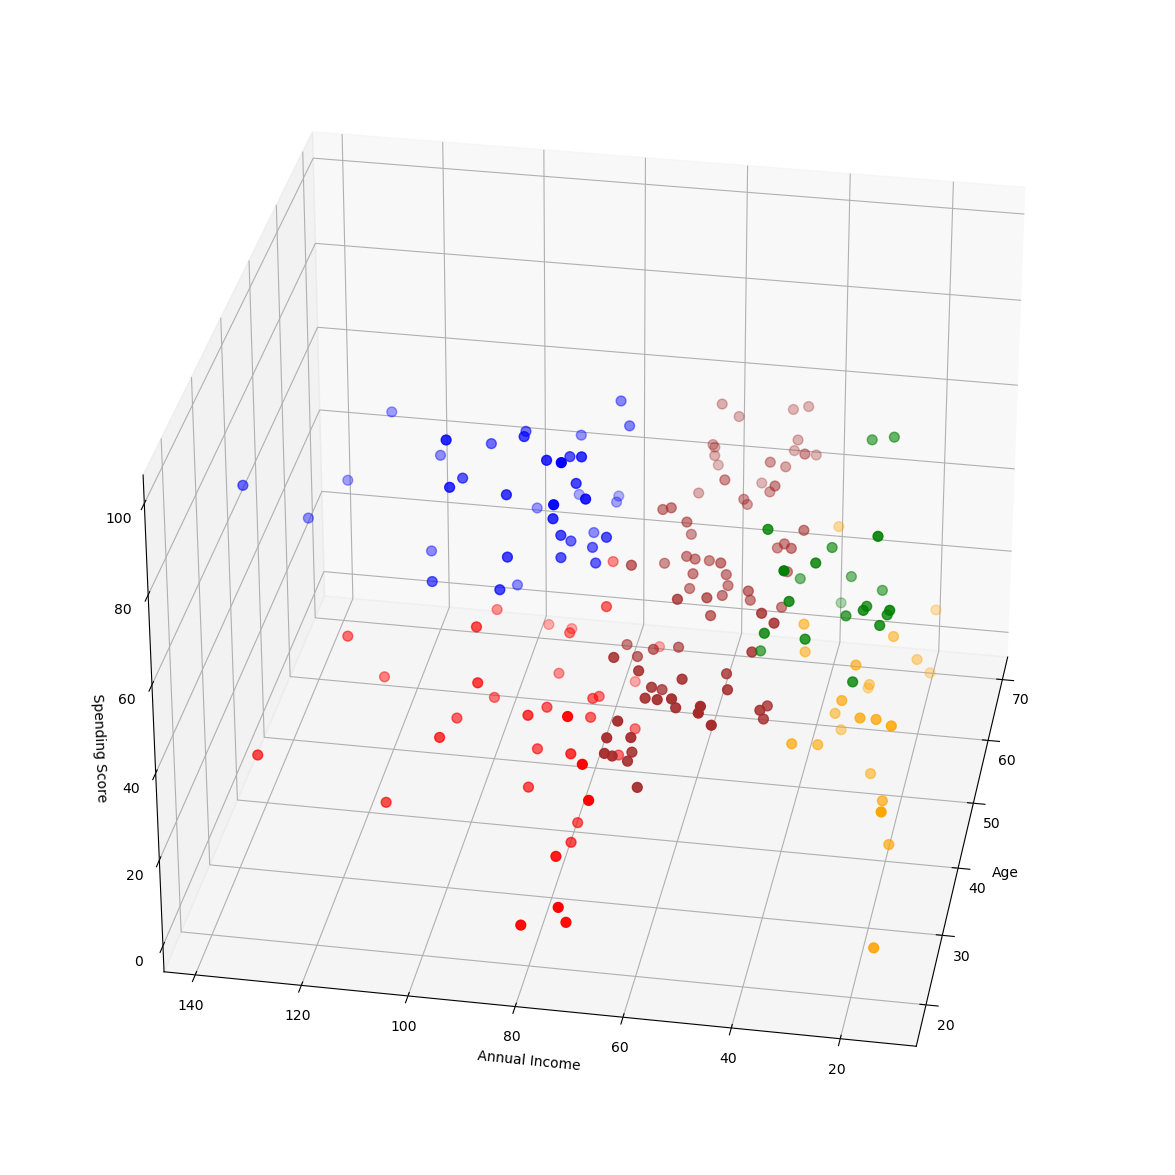

In [39]:
# 3d scatter plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50)

ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='green', s=50)

ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50)

ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='brown', s=50)

ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='orange', s=50)

ax.view_init(30, 190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()

* 3D scatter plot graph of the data

* <b>ax.scatter()</b> - plots the data points by filtering and specify the color for each cluster

* You may change the <b>view_init()</b> parameters for a different angle view of the scatterplot

* You may use different plot method for a different view

## Final Thoughts

* You can use different hyperparameters to obtain different results

* You need to find the best number of clusters based on the data available